# FEV23 Rakuten Bootcamp

## Mise en place

Chargement des librairies et des données.

In [1]:
# Version de Python utilisée : 3.9.xx
# Import des librairies 
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import imagesize
from PIL import Image

sns.set_theme()


In [2]:
import sys
sys.path.append("..")

from src.data import data, analysis


DATA_DIR = "../data"
df = data.load_data(DATA_DIR)
df_images = analysis.get_img_information(DATA_DIR)

## Analyse des données

### Analyse des images

#### Qualité des images

Affichage du compte, the la moyenne et de l'écart-type de la largeur, hauteur et du ratio des images.

Nous constatons que toutes les images sont de même taille.

In [3]:
# Display the count, average and std of all the images
df_images[["Width", "Height", "Aspect Ratio"]].describe().iloc[:3]

Width   Height  Aspect Ratio
count  84916.0  84916.0       84916.0
mean     500.0    500.0           1.0
std        0.0      0.0           0.0

#### Affichage d'images aléatoires

1 3


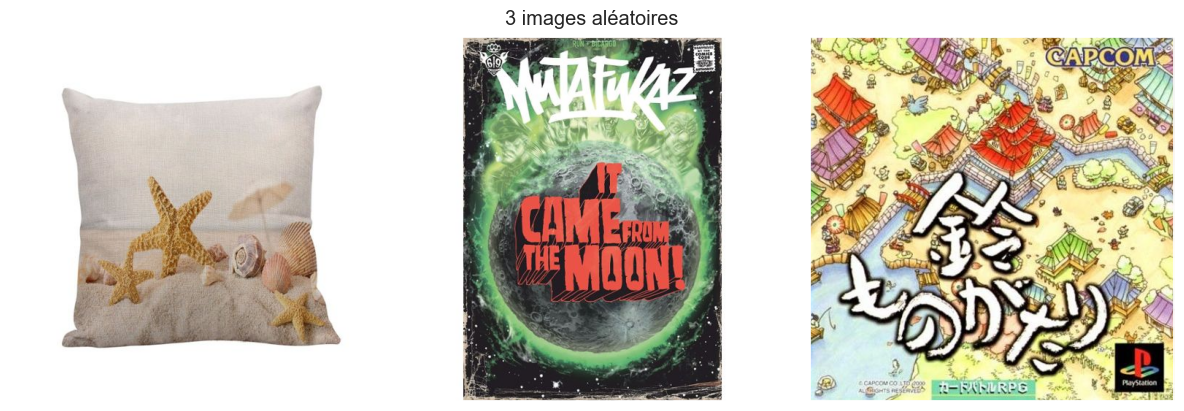

In [4]:
analysis.display_random_img(DATA_DIR, nb_img=3, df=df)

#### Images aléatoires dans chaque catégorie

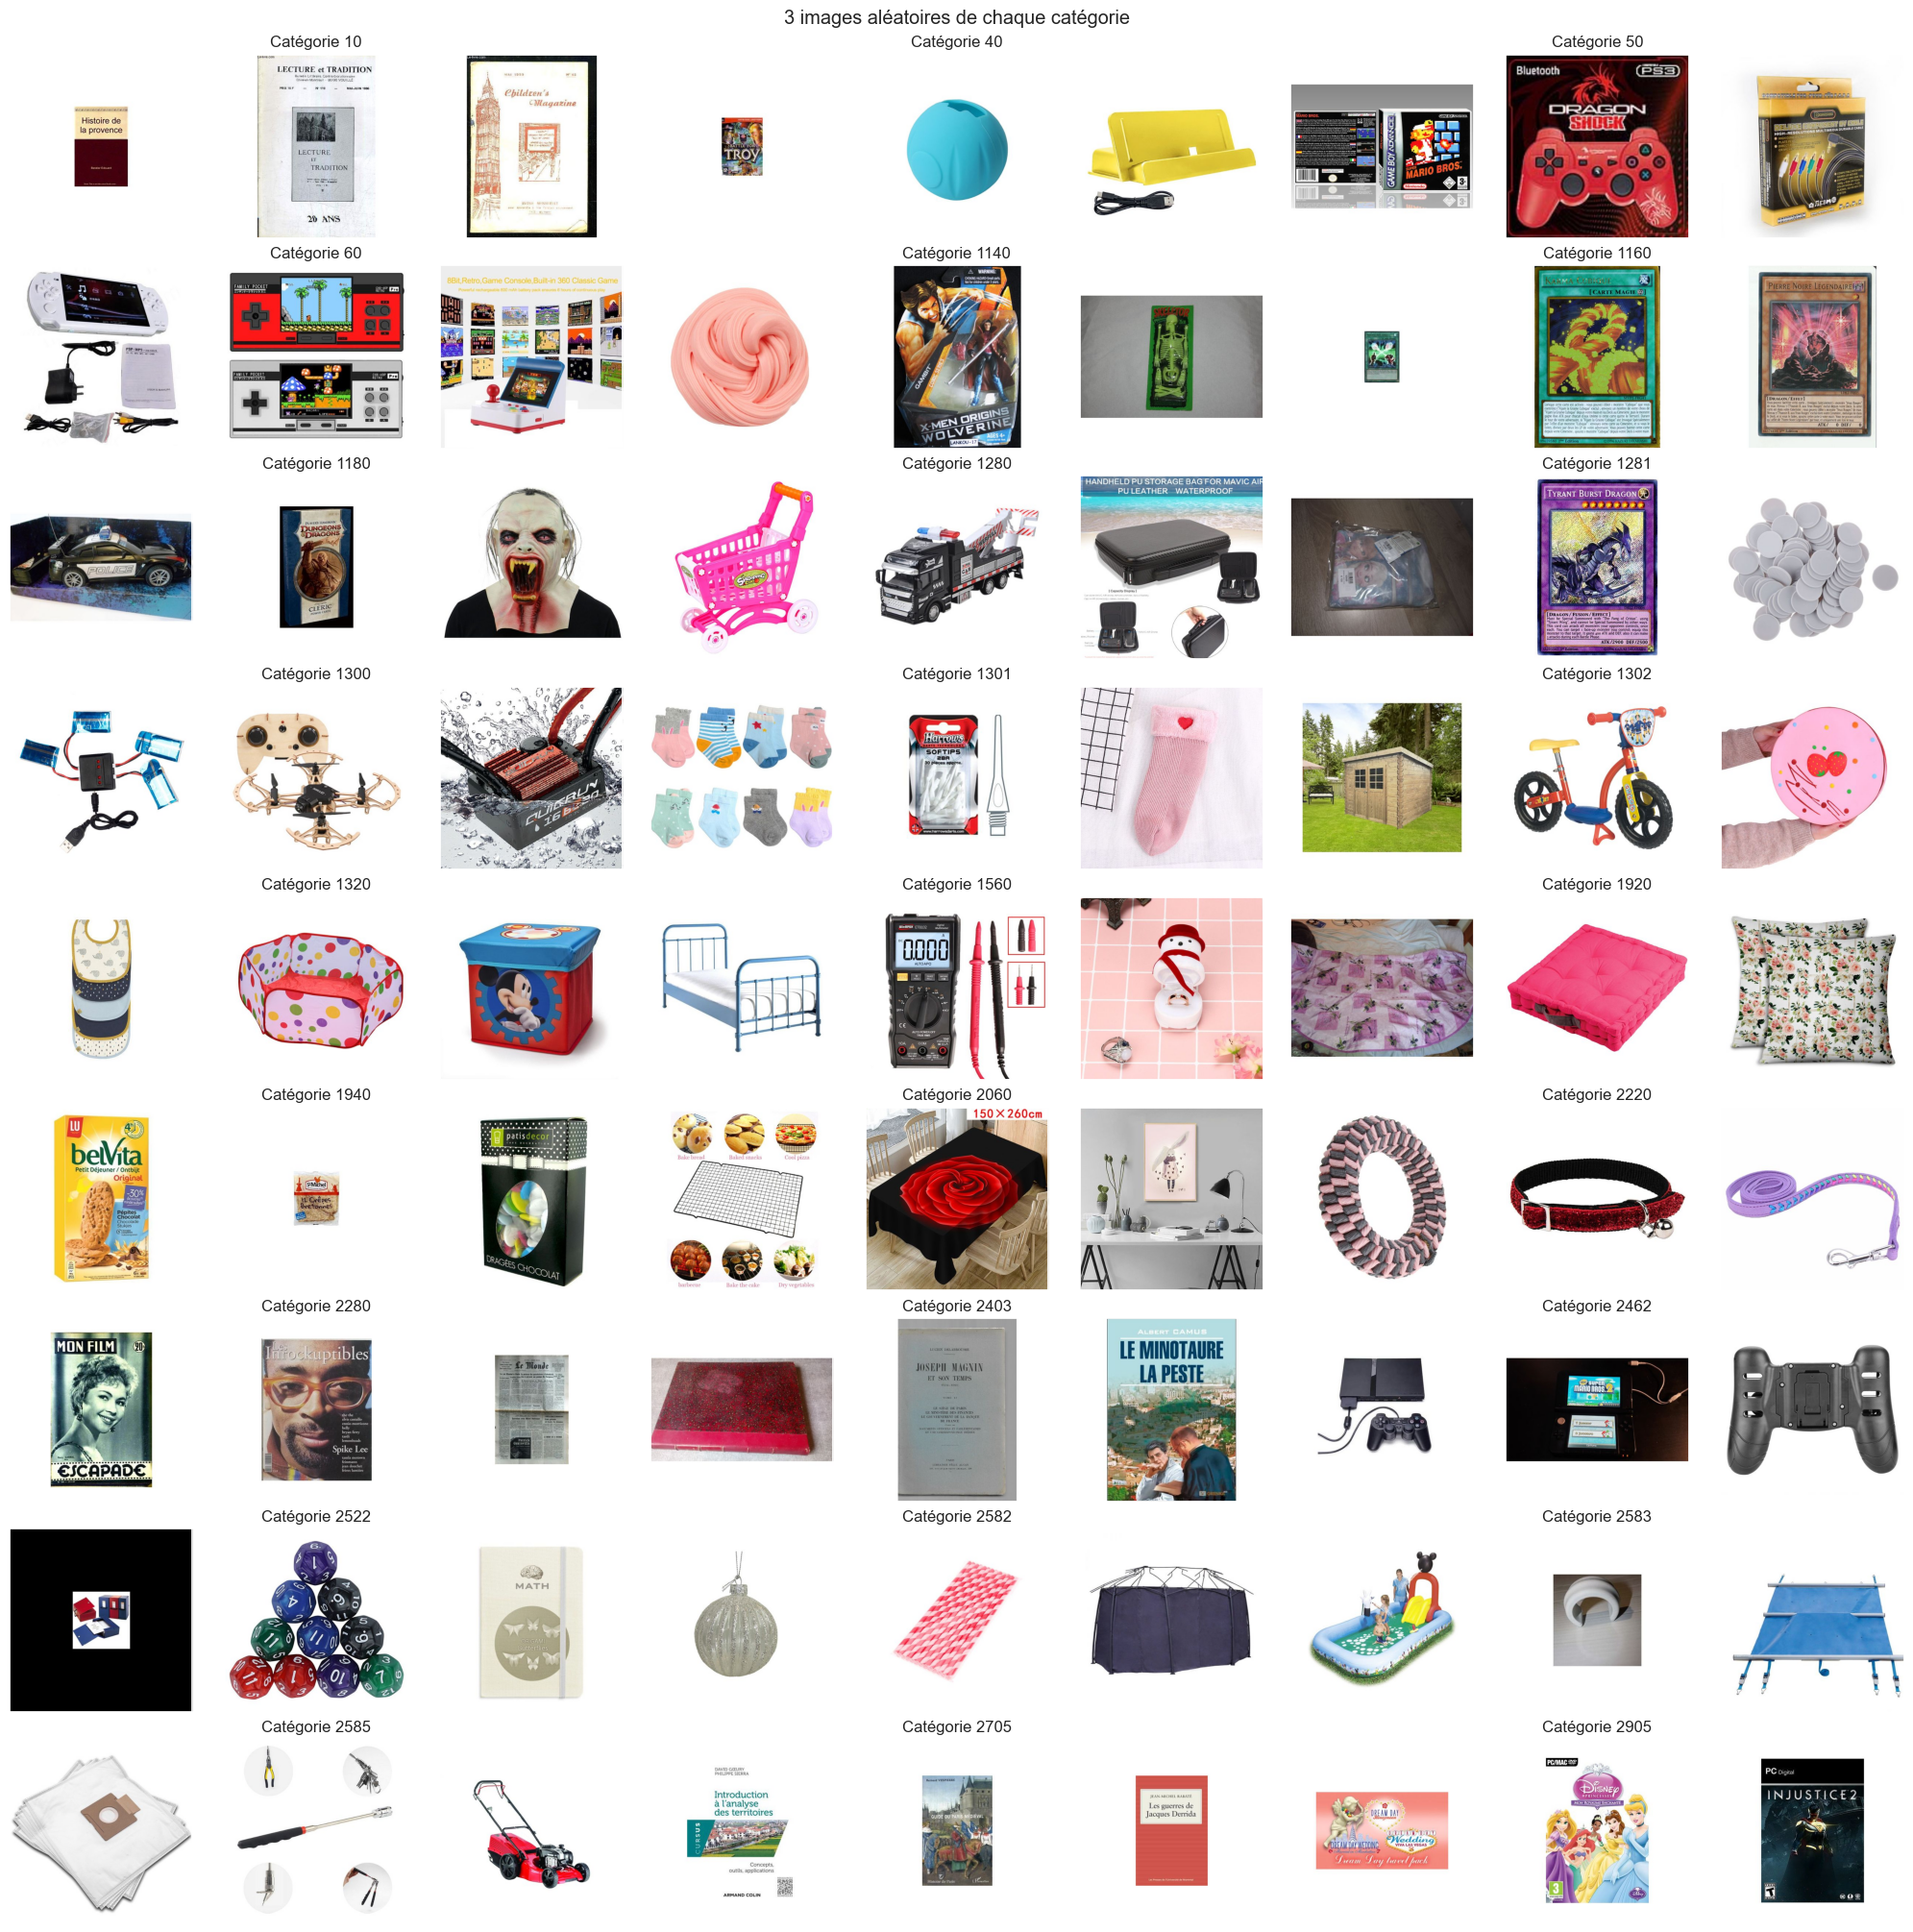

In [5]:
analysis.display_img_per_category(3, DATA_DIR, df)

### Afficher 5 images d'une catégorie

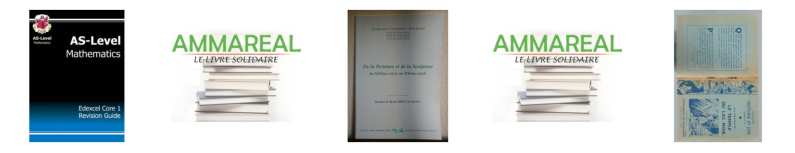

In [6]:
analysis.display_random_img_per_category(prdtypecode=10, nb_img=5, datadir=DATA_DIR, df=df)

#### Afficher quelle classe de produit à le plus d'images avec des bandes blanches

In [88]:
has_white_stripes = analysis.img_with_white_stripes(nb_pixels=5, datadir=DATA_DIR,
                     img_filenames=df_images["FileName"])

pd.Series(has_white_stripes).value_counts(normalize=True)

True     73028
False    11888
Name: white_bands, dtype: int64

### Répartition des images sans bande blanche par catégorie

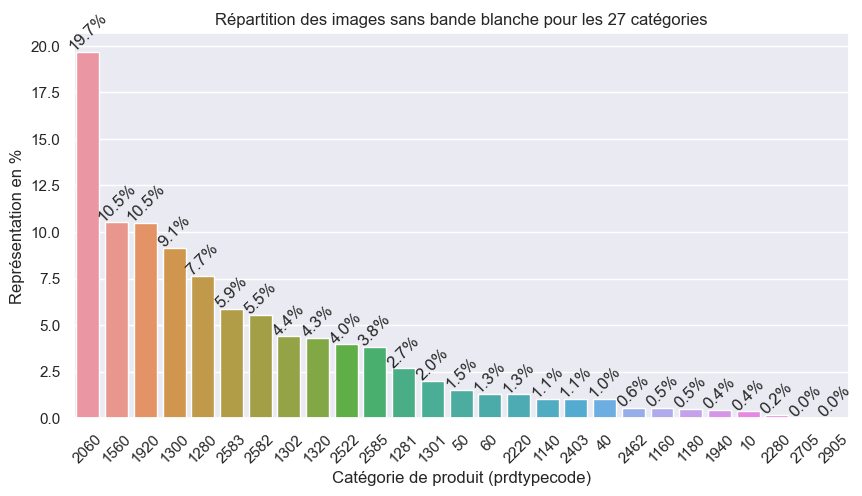

In [96]:
df_none_white = df[df["white_bands"] == False]

prdtypecode_proportion = pd.DataFrame(df_none_white["prdtypecode"].value_counts(normalize=True)).reset_index()
prdtypecode_proportion.rename(columns = {"prdtypecode": "count", "index":"prdtypecode"}, inplace=True)
prdtypecode_proportion = prdtypecode_proportion.astype({"prdtypecode":"str"})

nb_categories = len(prdtypecode_proportion.index)

ax = sns.barplot(x=prdtypecode_proportion["prdtypecode"], y=prdtypecode_proportion["count"]*100)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(prdtypecode_proportion["count"][i]*100), (x, y), ha='center', rotation=45)

ax.figure.set_size_inches((10, 5))
plt.title(f"Répartition des images sans bande blanche pour les {nb_categories} catégories")
plt.xlabel("Catégorie de produit (prdtypecode)")
plt.ylabel("Représentation en %")
plt.xticks(rotation = 45);